# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [66]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city q=London&limit=5&appid={API key}
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | huayacocotla
Processing Record 3 of Set 1 | namibe
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | zaozersk
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | la'ie
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | leua
Processing Record 11 of Set 1 | suva
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | bartica
Processing Record 15 of Set 1 | challapata
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | babolsar
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | crane
Processing Record 23 of Set 1 | hawaiian p

In [67]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [68]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,22.47,84,96,4.27,US,1724024882
1,huayacocotla,20.5500,-98.4833,16.26,85,80,2.39,MX,1724025171
2,namibe,-15.1961,12.1522,16.87,86,10,2.15,AO,1724025172
3,yellowknife,62.4560,-114.3525,21.34,60,75,4.12,CA,1724025173
4,zaozersk,69.4005,32.4476,13.96,66,59,2.53,RU,1724025174


In [69]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [70]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,22.47,84,96,4.27,US,1724024882
1,huayacocotla,20.5500,-98.4833,16.26,85,80,2.39,MX,1724025171
2,namibe,-15.1961,12.1522,16.87,86,10,2.15,AO,1724025172
3,yellowknife,62.4560,-114.3525,21.34,60,75,4.12,CA,1724025173
4,zaozersk,69.4005,32.4476,13.96,66,59,2.53,RU,1724025174


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

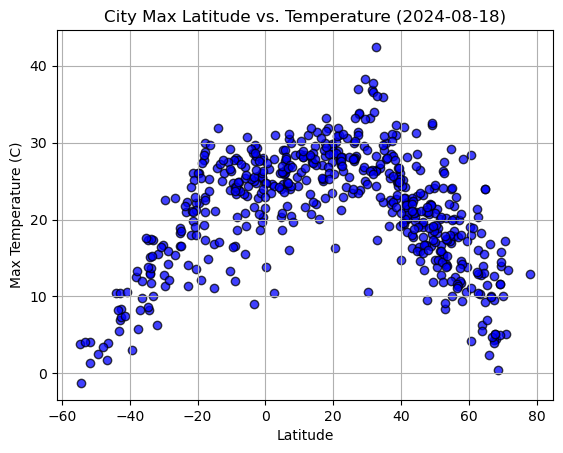

In [88]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Max Latitude vs. Temperature (2024-08-18)')
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

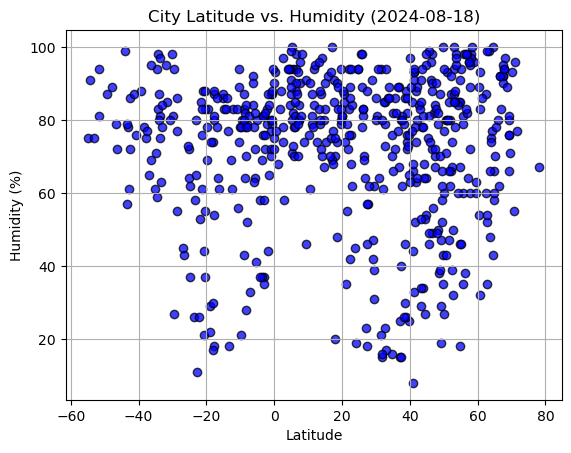

In [89]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Humidity (2024-08-18)')
plt.xlabel('Latitude') 
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

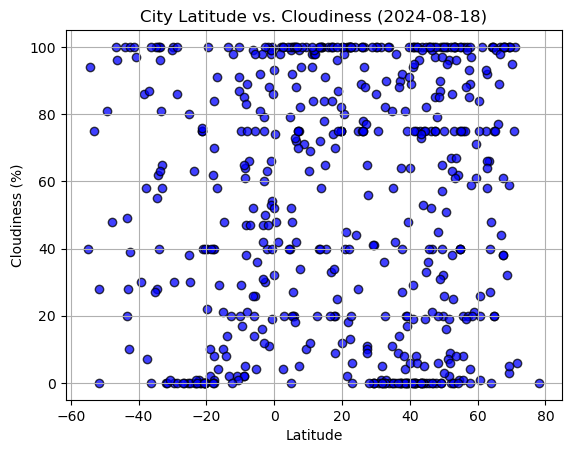

In [90]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Cloudiness (2024-08-18)')
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

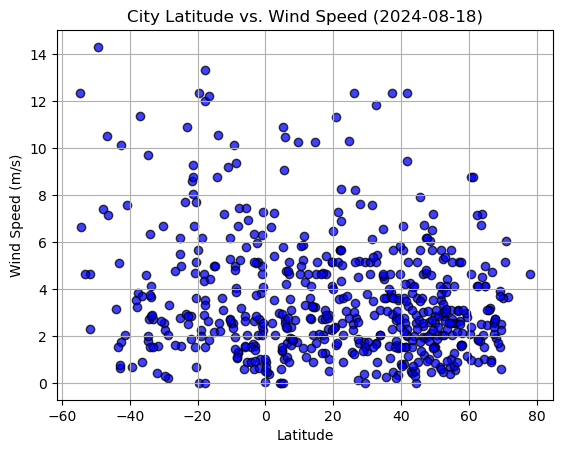

In [91]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Wind Speed (2024-08-18)')
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [110]:
# Define a function to create Linear Regression plots
def lin_reg_plot (x_values, y_values, x_label, y_label, title, cord_x, cord_y):
    # Linear regresion calculation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Print the rvalue
    print(f'The r^2-value is: {rvalue**2}')

    # Scatter plot and linear regresion plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(cord_x, cord_y),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [98]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,22.47,84,96,4.27,US,1724024882
1,huayacocotla,20.5500,-98.4833,16.26,85,80,2.39,MX,1724025171
3,yellowknife,62.4560,-114.3525,21.34,60,75,4.12,CA,1724025173
4,zaozersk,69.4005,32.4476,13.96,66,59,2.53,RU,1724025174
5,badger,64.8000,-147.5333,23.95,58,20,4.12,US,1724025175


In [99]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,namibe,-15.1961,12.1522,16.87,86,10,2.15,AO,1724025172
6,port-aux-francais,-49.3500,70.2167,2.53,87,81,14.31,TF,1724025177
8,waitangi,-43.9535,-176.5597,10.46,99,100,3.13,NZ,1724025179
10,suva,-18.1416,178.4415,27.71,74,40,4.63,FJ,1724025181
11,grytviken,-54.2811,-36.5092,-1.23,91,94,6.65,GS,1724025182


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.41678038625449965


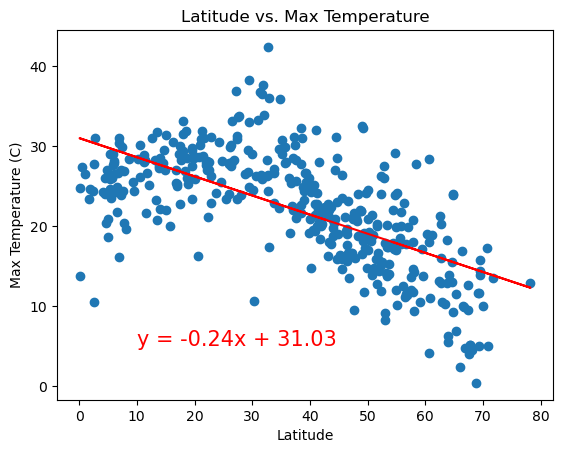

In [137]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (C)', 'Latitude vs. Max Temperature', 10, 5)

The r^2-value is: 0.6475267159081146


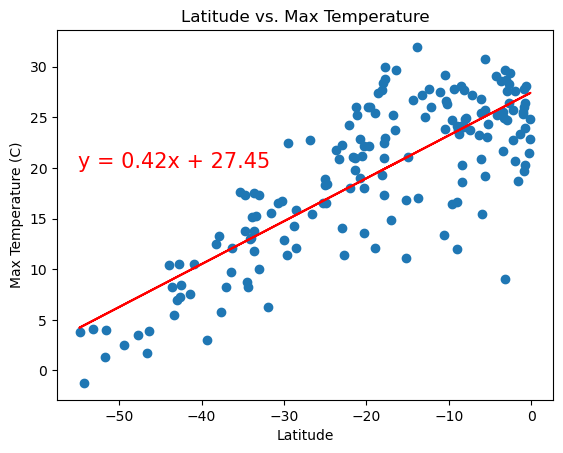

In [138]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (C)', 'Latitude vs. Max Temperature', -55, 20)

**Discussion about the linear relationship:** 
- In the Northern Hemisphere, there is an inverse relationship between latitude and temperature. For every one-unit increase in the latitude, temperature decreases by 0.24 units. This suggests a moderate negative correlation between the variables. With an r^2 of 0.4167, the model has moderate predictive power; approximately 41.67% of the variance in temperature can be explained by the city's latitude.
- In the Souther Hemisphere, there is an direct relationship between latitude and temperature. For every one-unit increase in the latitude, temperature increases by 0.42 units. This suggests a moderate strong positive correlation between the variables. With an r^2 of 0.6475, suggests a stronger fit of the model; approximately 64.75% of the variance in temperature can be explained by the city's latitude. Predictions of temperature in the Souther Hemisphere based on the city's latitude will be more reliable.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.011329091506405736


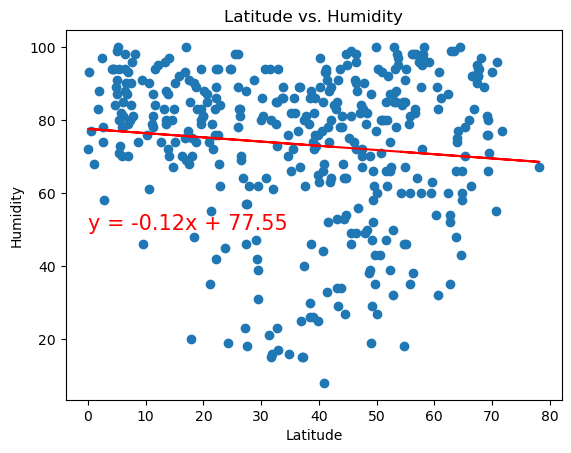

In [139]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Latitude vs. Humidity', 0, 50)

The r^2-value is: 0.014823751138079029


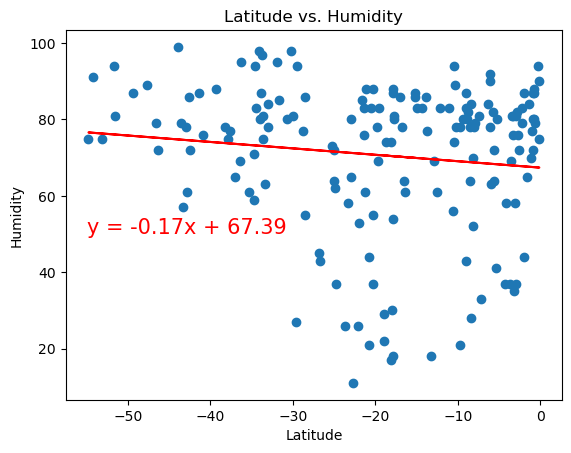

In [140]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Latitude vs. Humidity', -55, 50)

**Discussion about the linear relationship:**
- In the Northern Hemisphere, there is an inverse relationship between latitude and humidity. For every one-unit increase in the latitude, humidity decreases by 0.12 units. This suggests a weak negative correlation between the variables. With an r^2 of 0.0113, the model has low predictive power; approximately 1.13% of the variance in humidity can be explained by the city's latitude.
- In the Souther Hemisphere, there is an inverse relationship between latitude and humidity. For every one-unit increase in the latitude, humidity decreases by 0.17 units. This suggests a weak negative correlation between the variables. With an r^2 of 0.0148, the model has low predictive power; approximately 1.48% of the variance in humidity can be explained by the city's latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.005460522903165079


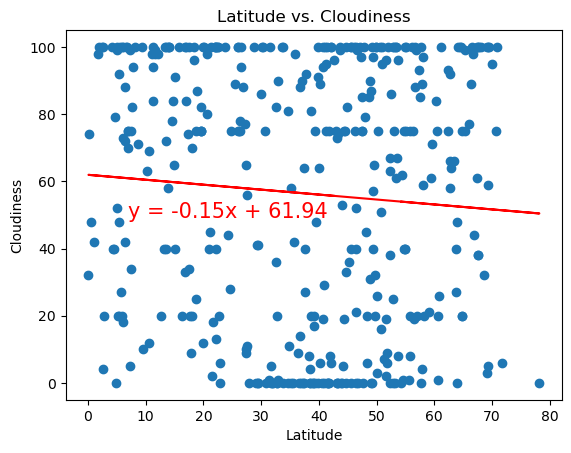

In [141]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Latitude vs. Cloudiness', 7, 49)

The r^2-value is: 2.7698784976629235e-05


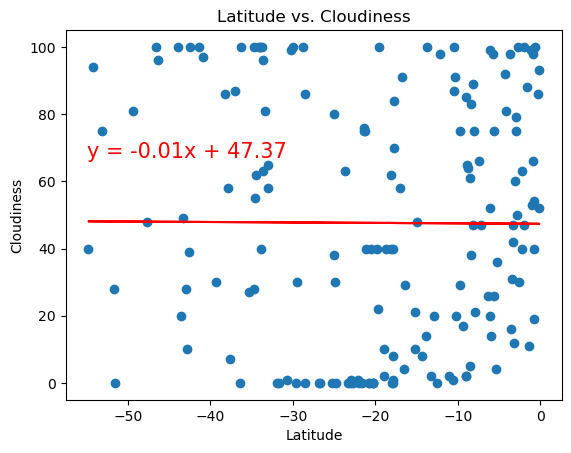

In [144]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Latitude vs. Cloudiness', -55, 67)

**Discussion about the linear relationship:**
- In the Northern Hemisphere, there is an inverse relationship between latitude and cloudiness. For every one-unit increase in the latitude, cloudiness decreases by 0.15 units. This suggests a weak negative correlation between the variables. With an r^2 of 0.0054, the model has no predictive power; approximately 0.54% of the variance in cloudiness can be explained by the city's latitude.
- In the Souther Hemisphere, there is an inverse relationship between latitude and cloudiness. For every one-unit increase in the latitude, cloudiness decreases by 0.01 units. This suggests a very weak negative correlation between the variables. With an r^2 of 0.00002769, the model has no predictive power; approximately 0.0027% of the variance in cloudiness can be explained by the city's latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.007220023867717722


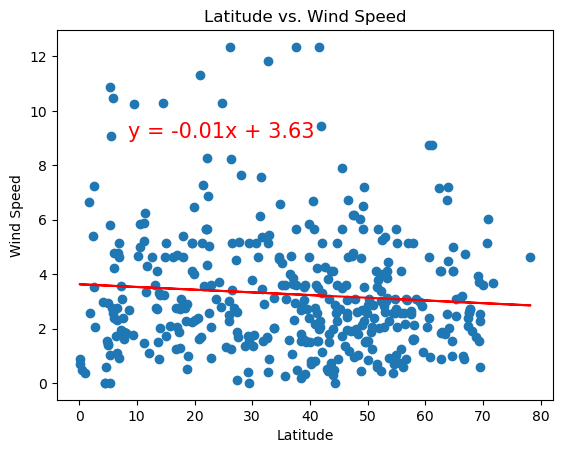

In [149]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Latitude vs. Wind Speed', 8.5, 9)

The r^2-value is: 0.028861228020549447


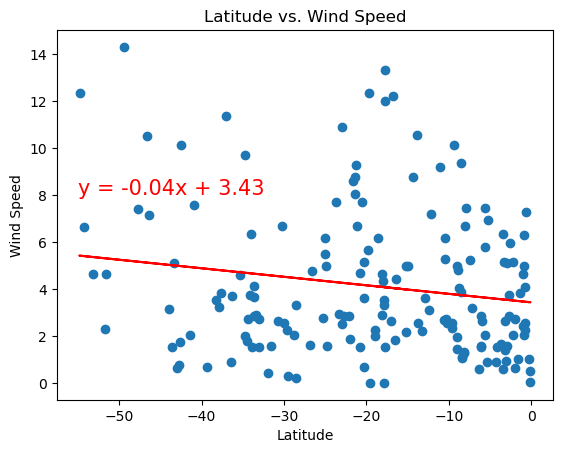

In [151]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Latitude vs. Wind Speed', -55, 8)

**Discussion about the linear relationship:**
- In the Northern Hemisphere, there is an inverse relationship between latitude and wind speed. For every one-unit increase in the latitude, wind speed decreases by 0.01 units. This suggests a weak negative correlation between the variables. With an r^2 of 0.0072, the model has no predictive power; approximately 0.72% of the variance in wind speed can be explained by the city's latitude.
- In the Souther Hemisphere, there is an inverse relationship between latitude and wind speed. For every one-unit increase in the latitude, wind speed decreases by 0.04 units. This suggests a very weak negative correlation between the variables. With an r^2 of 0.0288, the model has a low predictive power; approximately 2.88% of the variance in wind speed can be explained by the city's latitude.